### Package Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import scipy.stats as st

### Define Functions and Classes

In [2]:
class CentralLimitTheorem:
    def __init__(self,
                 pop_size = 10000,
                 pop_mean = 500,
                 pop_std = 50,
                 sample_size = 50,
                 number_samples = 100):
        self.pop_size = pop_size
        self.pop_mean = pop_mean
        self.pop_std = pop_std
        self.sample_size = sample_size
        self.number_samples = number_samples
        self.population = np.random.normal(self.pop_mean, self.pop_std, self.pop_size)
        
        
    def plot_population(self):
        plt.hist(self.population, alpha = 0.5, bins = max([30, int(self.pop_size / 100)]), color = 'purple')
        plt.title(f'Population -- Mean: {self.pop_mean}, Std. Dev: {self.pop_std}, Size: {self.pop_size}')
        plt.show()
        
    def take_sample(self):
        sample_x = random.sample(list(self.population), self.sample_size)
        return sample_x
    
    def plot_sample(self):
        sample_x = self.take_sample()
        sample_mean = np.round(np.mean(sample_x), 2)
        sample_std = np.round(np.std(sample_x), 2)
        sample_delta = np.round(np.mean(sample_x) - self.pop_mean, 2)
        plt.hist(sample_x, alpha = 0.5, color = 'green')
        plt.title(f'Sample of {self.sample_size} | Mean: {sample_mean}, Mean Difference from Population: {sample_delta}')
        plt.show()
        
    def take_multiple_sample_means(self):
        sample_means = [np.mean(self.take_sample()) for i in range(self.number_samples)]
        sample_deltas = [x - self.pop_mean for x in sample_means]
        return sample_means, sample_deltas
    
    def plot_multiple_sample_means(self):
        print(f'Taking {self.number_samples} samples of {self.sample_size}')
        sample_means, sample_deltas = self.take_multiple_sample_means()
        plt.figure()
        plt.hist(sample_means, alpha = 0.5, color = 'blue')
        plt.title(f'Sample Means')
        plt.show()
        
        plt.figure()
        plt.hist(sample_deltas, alpha = 0.5, color = 'orange')
        plt.title(f'Sampling Error (Difference from Population Mean and Each Sample Mean)')
        plt.show()    

# Central Limit Theorem Example

### Define Class Object

In [3]:
clt = CentralLimitTheorem()

### Let's Plot the Population
##### Note - in practice, you often don't know what the population actually is

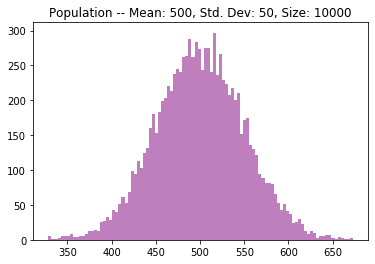

In [4]:
clt.plot_population()

### Now let's take a single sample (of n = 50) from the population

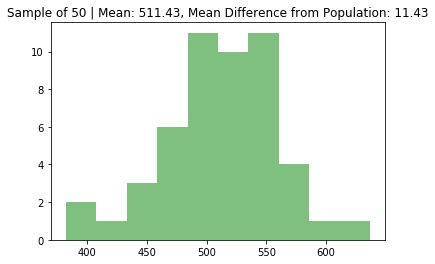

In [5]:
clt.plot_sample()

### Let's take one hundred samples of size 50 repeatedly and look at the distribution

Taking 100 samples of 50


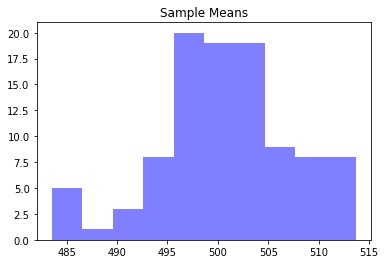

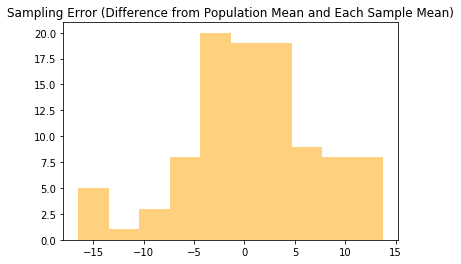

In [6]:
clt.plot_multiple_sample_means()

### Notice that in the second chart (distribution of sample mean less population mean), the average is near zero.

### From this, we can infer how often a sample of size 50 from this population will differ significantly.

# Other Useful Functions

### Define Functions

In [7]:
def ci_to_zscore(CI, tails = 2):
    """
    Convert some confidence interval ("CI") to a z-score given 1 or 2-tailed assumption
    e.g. ci_to_score(0.95, tails = 2) should return 1.96
    """
    if tails == 2:
        zscore = st.norm.ppf((1 - CI) / 2)
    else:
        zscore = st.norm.ppf((1 - CI))
    print(f'Note: this assumes tails = {tails}')
    return zscore

def zscore_to_ci(Z, tails = 2):
    """
    Convert some zscore ("Z") to a confidence interval given 1 or 2-tailed assumption
    e.g. zscore_to_ci(1.96, tails = 2) should return 0.95
    """
    if tails == 2:
        ci = 1 - ((1 - st.norm.cdf(Z)) * 2)
    else:
         ci = st.norm.cdf(Z)
    print(f'Note: this assumes tails = {tails}')
    return ci


def two_tail_confidence_interval(sample_size, sample_mean, sample_stdev, ci = 0.95):
    """
    For a given sample, calculate upper and lower limit estimates of the population mean
    given a certain confidence interval
    """
    z_score = ci_to_zscore(CI = ci, tails = 2)
    upper_limit = np.round(sample_mean + (z_score * sample_stdev / np.sqrt(sample_size)),1)
    lower_limit = np.round(sample_mean - (z_score * sample_stdev / np.sqrt(sample_size)),1)
    percentage = str(np.round(ci * 100, 1))
    print(f'We are {percentage}% confident that the population mean is between {lower_limit} and {upper_limit}')
    
    

def one_tail_confidence_interval(sample_size, sample_mean, sample_stdev, ci = 0.95, above_below = 'below'):
    """
    For a given sample, calculate the odds that the population mean is above or below a certain number
    """
    z_score = ci_to_zscore(CI = ci, tails = 1)
    upper_limit = np.round(sample_mean + (z_score * sample_stdev / np.sqrt(sample_size)),1)
    lower_limit = np.round(sample_mean - (z_score * sample_stdev / np.sqrt(sample_size)),1)
    percentage = str(np.round(ci * 100, 1))
    if above_below == 'below':
        out_str = f'We are {percentage}% confident that the population mean is below {upper_limit}'
    else:
        out_str = f'We are {percentage}% confident that the population mean is above {lower_limit}'
    print(out_str)

##### Convert a confidence interval to a z-score

In [8]:
ci_to_zscore(0.95)

Note: this assumes tails = 2


-1.959963984540054

#### Convert a z-score to a confidence interval

In [9]:
zscore_to_ci(1.96, tails = 2)

Note: this assumes tails = 2


0.950004209703559

##### Calculate upper and lower confidence limits

In [10]:
two_tail_confidence_interval(sample_size = 50,
                                sample_mean = 145.59,
                                sample_stdev = 1.69,
                                ci = 0.95)

Note: this assumes tails = 2
We are 95.0% confident that the population mean is between 146.1 and 145.1


### Example Problem 1

> A client of FedEx wants to deliver urgently a large freight from Texas to Denver. When asked about the weight of the cargo
they could not share the exact weight, however, they have specified that there are total of 36 boxes.
You are working as a data scientist for FedEx. And you have been challenged to tell the executives quickly whether or not
they can do this delivery.

>Since, we have worked with them for so many years and have seen so many freights from them we can confidently say that
the type of cargo they follow has a weight distribution with a mean of μ= 72 lb and a standard deviation of σ = 3 lb
The plane we have can carry max cargo weight upto 2640 lb..

>Based on this information what is the probability that all of the cargo can be safely loaded onto the planes and transported?

##### Get z-score

In [11]:
sample_size = 36
stdev = 3
mean_diff = (73.06 - 72)
z_score =  mean_diff / (stdev / np.sqrt(sample_size))
print(f'Z-Score: {z_score}')

Z-Score: 2.1200000000000045


##### Convert to one-tailed probability

In [12]:
zscore_to_ci(z_score, tails = 1)

Note: this assumes tails = 1


0.9829969773523674

### Example Problem 2

> Suppose we are manufacturing cricket balls, which are required to weigh around 145 grams for use in the major league. We
just started using a new supplier for some of the raw materials. 

> Assume that we have randomly sampled 50 cricket balls
from the first batch that uses the new materials.

> From that sample, we have calculated an average weight of 145.59 grams,
and those samples have a standard deviation of 1.67 grams.

> Construct 95% confidence interval

In [13]:
two_tail_confidence_interval(sample_size = 50,
                             sample_mean = 145.59,
                             sample_stdev = 1.69,
                             ci = 0.95)

Note: this assumes tails = 2
We are 95.0% confident that the population mean is between 146.1 and 145.1


> Construct 99% confidence interval

In [14]:
two_tail_confidence_interval(sample_size = 50,
                             sample_mean = 145.59,
                             sample_stdev = 1.69,
                             ci = 0.99)

Note: this assumes tails = 2
We are 99.0% confident that the population mean is between 146.2 and 145.0


### Example Problem 3

> Tom is working in a credit card processing company as a team leader. His team is responsible to validate certain data for
new credit card applications. 

> The time spent by his team on an application is normally distributed with average 300
minutes and standard deviation 40 minutes.

> Tom and his team worked on process improvement to reduce the time spent in processing new applications. After
implementing the improvements, Tom checked the time spent by his team on randomly selected 25 new card applications.
The average time spent is 290 min. Tom is happy that, though it is a small improvement, it is a step in right direction. He
shares the good news with his manager Lisa. But Lisa in not convinced about the improvement.
At 95% confidence, has the processes really improved?

In [15]:
def one_sample_z_test(pop_mean, pop_stdev, sample_mean, sample_size):
    """
    Perform a one-sample z-test given population mean and standard deviation and sample mean
    """
    mean_diff = sample_mean - pop_mean
    z_score = mean_diff / (pop_stdev / np.sqrt(sample_size))
    return z_score

In [16]:
z_score = one_sample_z_test(pop_mean = 300, pop_stdev = 40, sample_mean = 290, sample_size = 25)
print(f'Z-score: {z_score}')

Z-score: -1.25


In [17]:
zscore_to_ci(z_score, tails = 1)

Note: this assumes tails = 1


0.10564977366685535

### Example Problem 4

> To compare customer satisfaction levels of two competing cable television companies, 170 customers of Company 1 and
350 customers of Company 2 were randomly selected and were asked to rate their cable companies on a five-point scale,
with 1 being least satisfied and 5 most satisfied. The survey results are summarized in the following table:

| Company 1 | Company 2 |
| --- | --- |
| N1 = 170  | N1 = 350  |
| X1 = 3.51  | X1 = 3.24  |
| Std = 0.51  | Std = 0.52  |

In [18]:
def two_sample_z_test(sample_mean1, sample_mean2,
                      sample_n1, sample_n2,
                      sample_std1, sample_std2,
                      mu_diff = 0):
    """
    Perform a one-sample z-test given population mean and standard deviation and sample mean
    """
    mean_diff = sample_mean1 - sample_mean2
    n_diff = sample_n1 - sample_n2
    pooled_se = np.sqrt((sample_std1**2 / sample_n1) + (sample_std2**2 / sample_n2))
    z_score = (mean_diff - mu_diff) / pooled_se
    return z_score

In [19]:
z_score = two_sample_z_test(sample_mean1 = 3.51, sample_mean2 = 3.24,
                            sample_n1 = 170, sample_n2 = 350,
                            sample_std1 = 0.51, sample_std2 = 0.52)
print(f'Z-score: {z_score}')

Z-score: 5.626744672973926


In [20]:
zscore_to_ci(z_score, tails = 1)

Note: this assumes tails = 1


0.999999990817888